Теперь решаем задачу регрессии - предскажем цены на недвижимость. Использовать датасет www.kaggle.com...iques/data (train.csv)

Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVC


In [2]:
df = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/ML/11. Ensemble/train.csv')
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
df.shape

(114321, 133)

In [4]:
#Посмотрим типы данных и пропущенные значения
check = pd.DataFrame( data = {'type' : df.dtypes, 
                   'is null' : df.isnull().sum(),
                    'total count' : df['ID'].count(),
                     })
check['share of ttl %'] = (check['is null'] / check['total count']).round(2)
check.loc[check['share of ttl %'] > 0.0]

,type,is null,total count,share of ttl %
v1,float64,49832,114321,0.44
v2,float64,49796,114321,0.44
v3,object,3457,114321,0.03
v4,float64,49796,114321,0.44
v5,float64,48624,114321,0.43
...,...,...,...,...
v126,float64,49832,114321,0.44
v127,float64,49832,114321,0.44
v128,float64,48624,114321,0.43
v130,float64,49843,114321,0.44


Пропусков очень много и они занимают большой процент от общего кол-ва, поэтому просто удалить мы их не можем.
Заменим их на медиану по столбцу 

In [5]:
df.fillna(df.median(), inplace = True)
df.isnull().sum()

ID           0
target       0
v1           0
v2           0
v3        3457
          ... 
v127         0
v128         0
v129         0
v130         0
v131         0
Length: 133, dtype: int64

In [6]:
check = pd.DataFrame( data = {'type' : df.dtypes, 
                   'is null' : df.isnull().sum(),
                    'total count' : df['ID'].count(),
                     })
check['share of ttl %'] = (check['is null'] / check['total count']).round(2)
check.loc[check['share of ttl %'] > 0.0].head(10)

,type,is null,total count,share of ttl %
v3,object,3457,114321,0.03
v30,object,60110,114321,0.53
v31,object,3457,114321,0.03
v56,object,6882,114321,0.06
v113,object,55304,114321,0.48


In [7]:
#Заполним пропуски значением нан
category = list(df.dtypes[df.dtypes == object].index)
df[category] = df[category].fillna('nan')


In [8]:
#Делаем категориальные переменнные с помощью onehot encoding
new_data = pd.get_dummies(df, columns = category)


In [9]:
# Объявим переменные Х и у
X = new_data[new_data.columns]
X.drop(columns = ['target'], inplace = True)
y = new_data['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
#Обучаем модель и смотрим качество модели 
model = RandomForestClassifier(
    n_estimators=50, 
    max_depth = 2
)
model.fit(X_train, y_train)
model.score(X_test, y_test)



0.761086975537219

In [12]:
model.predict_proba(X_test)

array([[0.20794762, 0.79205238],
       [0.22991103, 0.77008897],
       [0.26862155, 0.73137845],
       ...,
       [0.24345042, 0.75654958],
       [0.23907814, 0.76092186],
       [0.21697362, 0.78302638]])

In [13]:
# Выявляем наиболее важные признаки и выводим на график.

weight = pd.Series(model.feature_importances_)
weight.sort_values(ascending = False).head(5)
weight.index = pd.Series(X_train.columns)

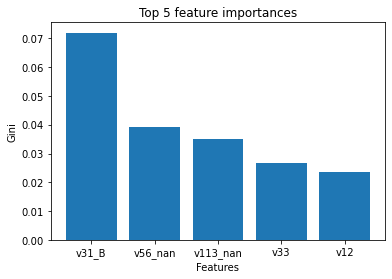

In [14]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(weight.sort_values(ascending=False).head().index, weight.sort_values(ascending=False).head())
plt.show()

## Стекинг

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

In [ ]:
# Создаем стэккинг и обучаем его на наших данных 
# добавляем 3 базовых моделей и одну мета-модель 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('KNeighborsRegressor', KNeighborsRegressor()),
        ('DecisionTree', DecisionTreeRegressor())
    ], RidgeCV())

In [ ]:
Regressor.fit(X_train, y_train)

In [ ]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')
# посмотрим качество на трейне и тесте в тотале


for i in Regressor.named_estimators:# тут посмотрим по оценку по каждой нашей моделе
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')